In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
#pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns
import math

# BOW
# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Below libraries are for similarity matrices using sklearn
import numpy as np
from sklearn.metrics import pairwise_distances

# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity 

Mounted at /content/drive


In [ ]:
path ="/content/drive/MyDrive/News_Recommendation_System/articles.csv"
df = pd.read_csv(path,index_col=0)

In [ ]:
df.head()

,tag,datetime,title,website,article_url,article
0,sport,"29/06/2022, 09:41:10",Aussie women cricketers’ wage hike fails to cl...,trtworld,https://www.trtworld.com/sport/aussie-women-cr...,"[""Australia's women cricketers will get a pay ..."
1,sport,"29/06/2022, 09:41:13",Tennis world concerned over whereabouts of Chi...,trtworld,https://www.trtworld.com/sport/tennis-world-co...,['Amid concerns over the whereabouts of Chines...
2,sport,"29/06/2022, 09:41:17",Barty pulls out of WTA Finals to focus on Aust...,trtworld,https://www.trtworld.com/sport/barty-pulls-out...,['World number one Ash Barty will not defend h...
3,sport,"29/06/2022, 09:41:20","Beijing lights the flame, kicking off 2022 Win...",trtworld,https://www.trtworld.com/sport/beijing-lights-...,['China has lit its Olympic flame in Beijing a...
4,sport,"29/06/2022, 09:41:24",Sport bodies boycott social media platforms ov...,trtworld,https://www.trtworld.com/sport/sport-bodies-bo...,"[""A British football-instigated boycott of the..."


In [ ]:
df.shape

(2388, 6)

In [ ]:
df['total_reading_time'] = ""

In [ ]:
df.head()

,tag,datetime,title,website,article_url,article,total_reading_time
0,sport,"29/06/2022, 09:41:10",Aussie women cricketers’ wage hike fails to cl...,trtworld,https://www.trtworld.com/sport/aussie-women-cr...,"[""Australia's women cricketers will get a pay ...",
1,sport,"29/06/2022, 09:41:13",Tennis world concerned over whereabouts of Chi...,trtworld,https://www.trtworld.com/sport/tennis-world-co...,['Amid concerns over the whereabouts of Chines...,
2,sport,"29/06/2022, 09:41:17",Barty pulls out of WTA Finals to focus on Aust...,trtworld,https://www.trtworld.com/sport/barty-pulls-out...,['World number one Ash Barty will not defend h...,
3,sport,"29/06/2022, 09:41:20","Beijing lights the flame, kicking off 2022 Win...",trtworld,https://www.trtworld.com/sport/beijing-lights-...,['China has lit its Olympic flame in Beijing a...,
4,sport,"29/06/2022, 09:41:24",Sport bodies boycott social media platforms ov...,trtworld,https://www.trtworld.com/sport/sport-bodies-bo...,"[""A British football-instigated boycott of the...",


In [ ]:
# count the number of words and assign a time spent on a particluar article
for i in range(0,2388):
  
  words = df['article'][i].split(" ")
  total_reading_time = math.ceil(len(words)/200)
  df['total_reading_time'][i] = total_reading_time

In [ ]:
df.sample(5)

,tag,datetime,title,website,article_url,article,total_reading_time
2357,education,"29/06/2022, 13:20:14",Students and police clash at Wits University i...,trtworld,https://www.trtworld.com/mea/students-and-poli...,"[""The University of the Witwatersrand has conf...",3
1918,education,"29/06/2022, 12:43:26",Eight most unusual schools in the world,trtworld,https://www.trtworld.com/in-depth/eight-most-u...,"[""It is hard to forget one's school days. Whil...",6
83,cricket,"29/06/2022, 09:49:52",Australia beat England to win cricket Women's ...,trtworld,https://www.trtworld.com/sport/australia-beat-...,"[""Australia, led by a sublime 170 from Alyssa ...",2
910,health,"29/06/2022, 11:05:15",WHO: Covid-19 cases on the rise again globally...,trtworld,https://www.trtworld.com/life/who-covid-19-cas...,"['Wednesday, October 27, 2021', 'Covid cases s...",9
483,samsung,"29/06/2022, 10:25:24",Huawei launches new flagship phones in bid to ...,trtworld,https://www.trtworld.com/business/huawei-launc...,['Huawei unveiled new flagship smartphones wit...,2


In [ ]:
df.dtypes

In [ ]:
#create random distribtuion on the time spent on reading article

# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)

df['user_time'] = ""
# generate some integers
for i in range(0,2388):
  value = randint(0, 10)
  df['user_time'][i] = value

import numpy as np
df['user_reading_time'] = np.where((df['total_reading_time'] < df['user_time']) ,df['total_reading_time'], df['user_time'])

df.tail()

,tag,datetime,title,website,article_url,article,total_reading_time,user_time,user_reading_time
2383,cricket,"29/06/2022, 13:21:58",Afghanistan beat Ireland to qualify for Cricke...,trtworld,https://www.trtworld.com/sport/afghanistan-bea...,"[""Afghanistan, after losing their opening thre...",2,6,2
2384,cricket,"29/06/2022, 13:22:01",Australia admit ball tampering in stunning con...,trtworld,https://www.trtworld.com/sport/australia-admit...,['Cricket Australia said Sunday that Steve Smi...,4,3,3
2385,cricket,"29/06/2022, 13:22:04",Australia jeered by South African crowd after ...,trtworld,https://www.trtworld.com/sport/australia-jeere...,['A muted chorus of boos greeted Australia whe...,3,0,0
2386,cricket,"29/06/2022, 13:22:07",Jones extends England 'dream job' until 2021,trtworld,https://www.trtworld.com/sport/jones-extends-e...,['England coach Eddie Jones said winning the 2...,3,4,3
2387,cricket,"29/06/2022, 13:22:10",Australia thrash England in Ashes opener,trtworld,https://www.trtworld.com/sport/australia-thras...,['David Warner and Cameron Bancroft got the re...,4,3,3


In [ ]:
df.drop(['user_time'],axis = 1 ,inplace = True)

In [ ]:
df.sample(10)

,tag,datetime,title,website,article_url,article,total_reading_time,user_reading_time
1313,business,"29/06/2022, 11:44:15",US trade body backs Canada's Bombardier over B...,trtworld,https://www.trtworld.com/business/us-trade-bod...,"[""Canada's Bombardier Inc on Friday won an une...",2,1
2026,politics,"29/06/2022, 12:53:26",At least 39 injured in knife attack at China k...,trtworld,https://www.trtworld.com/asia/at-least-39-inju...,['A school security guard injured at least 39 ...,2,2
1265,samsung,"29/06/2022, 11:38:54",Samsung recovers 60 percent of Note 7s from S....,trtworld,https://www.trtworld.com/life/samsung-recovers...,['More than 60 percent of Galaxy Note 7 smartp...,1,1
1597,technology,"29/06/2022, 12:11:39",Nokia phones to expand to high-end while also ...,trtworld,https://www.trtworld.com/business/nokia-phones...,['Seeking to capitalise on a remarkable comeba...,1,1
1967,samsung,"29/06/2022, 12:47:35",Samsung halts Note 7 shipments after battery e...,trtworld,https://www.trtworld.com/business/samsung-halt...,"[""Samsung's smartphone fans would be disappoin...",4,2
1159,religion,"29/06/2022, 11:28:32",Turkey aiming to become top destination for ha...,trtworld,https://www.trtworld.com/turkey/turkey-aiming-...,"[""After reaching a 10-year low in 2016, in the...",5,3
2218,crime,"29/06/2022, 13:08:53",Australian police shoot hostage taker dead,trtworld,https://www.trtworld.com/asia/australian-polic...,['Australian police on Monday shot dead a gunm...,2,2
165,cars,"29/06/2022, 09:56:11","EU urged to set phase-out date for new petrol,...",trtworld,https://www.trtworld.com/business/eu-urged-to-...,['The European Commission should set a date to...,2,2
1855,google,"29/06/2022, 12:35:48",Huawei founder says US 'underestimates' his co...,trtworld,https://www.trtworld.com/business/huawei-found...,"[""The US government's temporary easing of trad...",6,1
335,cars,"29/06/2022, 10:12:55",Renault drives on to record sales in first half,trtworld,https://www.trtworld.com/business/renault-driv...,['French automaker Renault said on Monday it s...,2,2


###**Inshorts Dataset**

In [ ]:
path ="/content/drive/MyDrive/News_Recommendation_System/news_articles.csv"
df = pd.read_csv(path,index_col=0)

In [ ]:
print(df.dtypes)

In [ ]:
print(f"shape of data =  {df.shape}")

shape of data =  (4453, 3)


In [ ]:
df.columns

Index(['Title', 'Content', 'Category'], dtype='object')

In [ ]:
# distribution of the corpus
plt.figure(figsize = (15,10))
sns.countplot(y = df['Category']);

In [ ]:
# check the null values 
df.isnull().sum()

Title       0
Content     0
Category    0
dtype: int64

In [ ]:
print(f" Duplicated values : {df.duplicated().sum()}")

 Duplicated values : 4079


In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
df.shape

(374, 3)

In [ ]:
# distribution of the corpus
plt.figure(figsize = (15,10))
sns.countplot(y = df['Category']);

###**TRTWorld Dataset**

In [ ]:
path ="/content/drive/MyDrive/News_Recommendation_System/articles.csv"
df = pd.read_csv(path,index_col=0)

In [ ]:
print(df.dtypes)
print(df.shape)

tag            object
datetime       object
title          object
website        object
article_url    object
article        object
dtype: object
(2388, 6)


In [ ]:
df.head()

,tag,datetime,title,website,article_url,article
0,sport,"29/06/2022, 09:41:10",Aussie women cricketers’ wage hike fails to cl...,trtworld,https://www.trtworld.com/sport/aussie-women-cr...,"[""Australia's women cricketers will get a pay ..."
1,sport,"29/06/2022, 09:41:13",Tennis world concerned over whereabouts of Chi...,trtworld,https://www.trtworld.com/sport/tennis-world-co...,['Amid concerns over the whereabouts of Chines...
2,sport,"29/06/2022, 09:41:17",Barty pulls out of WTA Finals to focus on Aust...,trtworld,https://www.trtworld.com/sport/barty-pulls-out...,['World number one Ash Barty will not defend h...
3,sport,"29/06/2022, 09:41:20","Beijing lights the flame, kicking off 2022 Win...",trtworld,https://www.trtworld.com/sport/beijing-lights-...,['China has lit its Olympic flame in Beijing a...
4,sport,"29/06/2022, 09:41:24",Sport bodies boycott social media platforms ov...,trtworld,https://www.trtworld.com/sport/sport-bodies-bo...,"[""A British football-instigated boycott of the..."


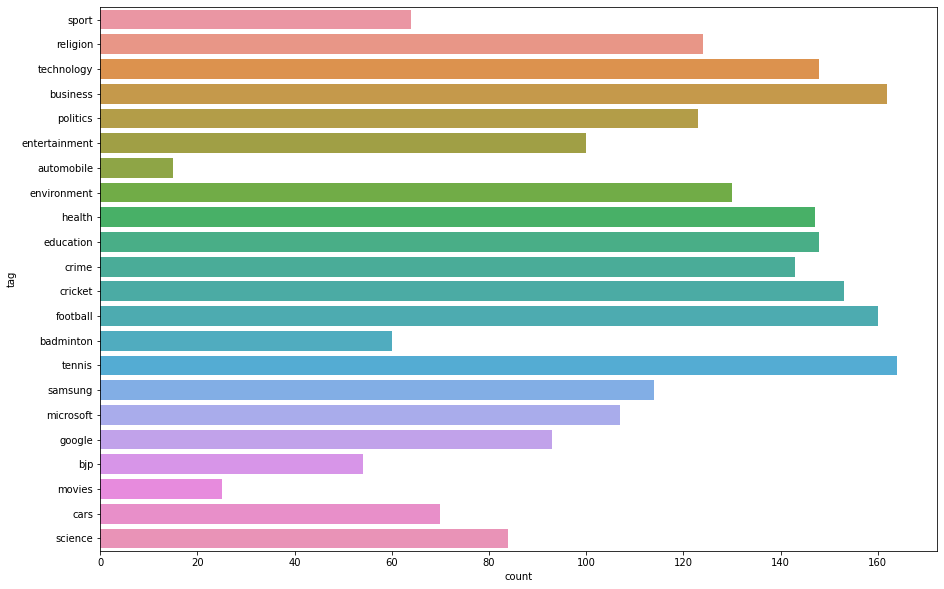

In [ ]:
# distribution of the corpus
plt.figure(figsize = (15,10))
sns.countplot(y = df['tag']);

###**Data Cleaning and Preprocessing**

In [ ]:
# check the null values 
df.isnull().sum()

tag            0
datetime       0
title          0
website        0
article_url    0
article        0
dtype: int64

In [ ]:
print(f" Duplicated values : {df.duplicated().sum()}")

 Duplicated values : 0


In [ ]:
df.head()

,tag,datetime,title,website,article_url,article
0,sport,"29/06/2022, 09:41:10",Aussie women cricketers’ wage hike fails to cl...,trtworld,https://www.trtworld.com/sport/aussie-women-cr...,"[""Australia's women cricketers will get a pay ..."
1,sport,"29/06/2022, 09:41:13",Tennis world concerned over whereabouts of Chi...,trtworld,https://www.trtworld.com/sport/tennis-world-co...,['Amid concerns over the whereabouts of Chines...
2,sport,"29/06/2022, 09:41:17",Barty pulls out of WTA Finals to focus on Aust...,trtworld,https://www.trtworld.com/sport/barty-pulls-out...,['World number one Ash Barty will not defend h...
3,sport,"29/06/2022, 09:41:20","Beijing lights the flame, kicking off 2022 Win...",trtworld,https://www.trtworld.com/sport/beijing-lights-...,['China has lit its Olympic flame in Beijing a...
4,sport,"29/06/2022, 09:41:24",Sport bodies boycott social media platforms ov...,trtworld,https://www.trtworld.com/sport/sport-bodies-bo...,"[""A British football-instigated boycott of the..."


In [ ]:
#splitting the datetime column
datetime_ = df['datetime'].str.split(",",n=2,expand = True)

# adding the column into original df 
df['date'] = datetime_[0]
df['time'] = datetime_[1]

x = df['date'].str.split("/",n=3,expand = True)
df['day'] = x[0]
df['month'] = x[1]
df['year'] = x[2]

In [ ]:
#splitting the article url column and collecting the keyowrds only 

keywords_from_url = df['article_url'].str.split("/",n=3,expand = True)

# adding the column into original df 

df['keywords_from_url'] = keywords_from_url[3]

In [ ]:
# dropping the columns 

df.drop(['article_url','website','datetime','date'], axis = 1,inplace = True)

In [ ]:
df.head()

,tag,title,article,time,day,month,year,keywords_from_url
0,sport,Aussie women cricketers’ wage hike fails to cl...,"[""Australia's women cricketers will get a pay ...",09:41:10,29,06,2022,sport/aussie-women-cricketers-wage-hike-fails-...
1,sport,Tennis world concerned over whereabouts of Chi...,['Amid concerns over the whereabouts of Chines...,09:41:13,29,06,2022,sport/tennis-world-concerned-over-whereabouts-...
2,sport,Barty pulls out of WTA Finals to focus on Aust...,['World number one Ash Barty will not defend h...,09:41:17,29,06,2022,sport/barty-pulls-out-of-wta-finals-to-focus-o...
3,sport,"Beijing lights the flame, kicking off 2022 Win...",['China has lit its Olympic flame in Beijing a...,09:41:20,29,06,2022,sport/beijing-lights-the-flame-kicking-off-202...
4,sport,Sport bodies boycott social media platforms ov...,"[""A British football-instigated boycott of the...",09:41:24,29,06,2022,sport/sport-bodies-boycott-social-media-platfo...


In [ ]:
# removing html

# this function is not working because we don't have html tags as we already removed it while scraping  

# from bs4 import BeautifulSoup

'''def remove_html(text):
  soup = BeautifulSoup(text,'lxml')
  html_free = soup.get_text()
  return html_free

remove_html(df['article'][0])'''

In [ ]:
# remove the punctuations

# import string for list of punctuations
import string

def remove_punc(text):
  no_punc = "".join([c for c in text if c not in string.punctuation])
  return no_punc

df['title'] = df['title'].apply(lambda x :remove_punc(x))
df['article'] = df['article'].apply(lambda x :remove_punc(x))

In [ ]:
# removing hyphen and slashes from keywords_from_url column

for i in range(0,2388):
  k = df['keywords_from_url'][i]
  df['keywords_from_url'][i] = k.replace("/", " ")

for i in range(0,2388):
  k = df['keywords_from_url'][i]
  df['keywords_from_url'][i] = k.replace("-", " ")

In [ ]:
df.tail()

,tag,title,article,time,day,month,year,keywords_from_url
2383,cricket,Afghanistan beat Ireland to qualify for Cricke...,Afghanistan after losing their opening three q...,13:21:58,29,06,2022,sport afghanistan beat ireland to qualify for ...
2384,cricket,Australia admit ball tampering in stunning con...,Cricket Australia said Sunday that Steve Smith...,13:22:01,29,06,2022,sport australia admit ball tampering in stunni...
2385,cricket,Australia jeered by South African crowd after ...,A muted chorus of boos greeted Australia when ...,13:22:04,29,06,2022,sport australia jeered by south african crowd ...
2386,cricket,Jones extends England dream job until 2021,England coach Eddie Jones said winning the 201...,13:22:07,29,06,2022,sport jones extends england dream job until 20...
2387,cricket,Australia thrash England in Ashes opener,David Warner and Cameron Bancroft got the requ...,13:22:10,29,06,2022,sport australia thrash england in ashes opener...


In [ ]:
# there are empty strings in our article columns 
df['article'][1655]

In [ ]:
# filling those empty string with nan value 

nan_value = float("NaN") #Convert NaN values to empty string.
df. replace(" ", nan_value, inplace=True)

In [ ]:
# checking the null values again 

df.isnull().sum()

tag                  0
title                0
article              2
time                 0
day                  0
month                0
year                 0
keywords_from_url    0
dtype: int64

In [ ]:
# removing the rows with nan values 

df.dropna(subset=['article'],inplace = True)

In [ ]:
df.shape  # we have droppd two rows 

(2386, 8)

In [ ]:
df.sample(5)

,tag,title,article,time,day,month,year,keywords_from_url
2271,microsoft,Web giants to cooperate on eliminating terror content online,Facebook Twitter Microsoft and Googleowned YouTube announced a drive to stop the proliferation of videos and messages showing beheadings executions and other gruesome content posted by the likes of Daesh or Al Qaeda The new programme announced Monday would create a shared database of unique digital fingerprints to help automatically identify videos or images the companies could remove We hope this collaboration will lead to greater efficiency as we continue to enforce our policies to help curb the pressing global issue of terrorist content online the companies said in a statement The move comes as social media giants face increasing scrutiny over their role in the explosion of socalled fake news — which is believed to have influenced the US election — as well as online bullying and hate speech Dr Thomas P Keenan talks to TRT World on the issue,13:12:36,29,06,2022,life web giants to cooperate on eliminating terror content online 3970
157,movies,Netflixs latest hiring hints video games could come to streaming platform,Netflix has hired veteran video game executive Mike Verdu signalling the video streaming service is poised to expand into another fertile field of entertainment Verdus addition as Netflixs vice president of game development confirmed on Thursday comes as the company seeks to sustain the momentum it gathered last year when people turned to the video streaming service to get through lockdowns imposed during the pandemic Netflix wound up adding 37 million worldwide subscribers last year by far the largest annual gain in its history But the landscape has changed dramatically now that the easing pandemic has allowed people to return to a semblance of their normal lives READ MORExa0Netflixs Mank tops Globes nominations as female directors break through Netflix snags former EA Oculus exec to lead its video game efforts httpstcoZA3nHW4UHp pictwittercommWbUVqjAcx The video service stumbled out of the gate during the first three months of this year posting its smallest firstquarter subscriber increase in four years and it predicted its springtime gains would also be meagerxa0 The Los Gatos California company is scheduled to report its results for the AprilJune period on Tuesday Adding video games would give Netflix another way to build upon the nearly 208 million subscribers that it boasted at the end of Marchxa0 It wouldnt come as a surprise either given that Netflix coCEO Reed Hastings has long said the company competes as much against video games for a piece of peoples leisure time as it does against other video streaming services offered by the likes of Amazon Hulu Walt Disney Co and Apple Netflix didnt directly comment on its potential entry into video gaming but left little doubt about its intent by announcing Verdus title at the company Verdu is joining Netflix from Facebooks Oculus where he oversaw the virtual reality headset makers games He previously worked at video game makers Electronic Arts and Zynga Now the biggest questions are when Netflix might start to offer video games and whether it intends to charge a separate fee to play them or include them as part of its video streaming services READ MORExa0Netflix extends Universal deal to license Illumination and Dreamworks films In a research note CFRA analyst Tuna Amobi called video games a logical complement to Netflixs vast library of TV series and films helping to set the stage for eventual price increases that most subscribers will accept Greg Peters Netflixs chief operating officer told investors in April that video games could be another way to engage subscribers already immersed in the stories unfolding in the services TV series and movies “We’re trying to figure out what are all these different ways that we can increase those points of connection we can deepen that fandom Peters said at the time Verdu will be reporting to Pet

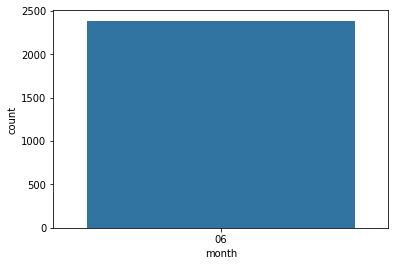

In [ ]:
# distribution according to month wise 
# we have all the articles of one date
sns.countplot(x = df['month'])

In [ ]:
# dropping few more columns
df.drop(['time','day','month','year'],axis = 1,inplace = True)

In [ ]:
# length of headline

import plotly.figure_factory as ff
fig = ff.create_distplot([df['title'].str.len()], ["ht"],show_hist=False,show_rug=False)
fig['layout'].update(title={'text':'PDF','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Length of a title",yaxis_title="probability")
fig.update_layout(showlegend = False,width=500,height=500)
fig

In [ ]:
# tokenize

# import natural language toolkit
import nltk
# import tokenizer
from nltk.tokenize import RegexpTokenizer
# import the stop word list
from nltk.corpus import stopwords

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
df['title'] = df['title'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['article'] = df['article'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['keywords_from_url'] = df['keywords_from_url'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [ ]:
df.sample(5)

,tag,title,article,date,time,keywords_from_url
1112,tennis,"[support, pours, in, for, naomi, osaka, after,...","[japan, has, joined, leading, figures, in, ten...",29/06/2022,11:23:47,"[sport, support, pours, in, for, naomi, osaka,..."
1630,science,"[why, are, us, scientists, going, rogue, again...","[who, are, the, people, behind, these, twitter...",29/06/2022,12:14:52,"[americas, why, are, us, scientists, going, ro..."
713,politics,"[malaysias, pm, faces, calls, to, quit, after,...","[malaysian, prime, ministernmuhyiddin, yassin,...",29/06/2022,10:46:49,"[asia, malaysia, s, pm, faces, calls, to, quit..."
1599,business,"[farm, workers, shortage, leaves, us, crops, t...","[mexican, migrants, were, used, to, be, very, ...",29/06/2022,12:12:02,"[americas, farm, workers, shortage, leaves, us..."
768,crime,"[new, charges, in, floyd, killing, may, give, ...","[prosecutors, seeking, to, put, a, formernminn...",29/06/2022,10:51:42,"[americas, new, charges, in, floyd, killing, m..."


In [ ]:
# remove stop words after tokenization

nltk.download('stopwords')
# to check the list of the words 
stopwords.words('english')

def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words('english')]
  return words

df['title'] = df['title'].apply(lambda x : remove_stopwords(x))
df['article'] = df['article'].apply(lambda x : remove_stopwords(x))
df['keywords_from_url'] = df['keywords_from_url'].apply(lambda x : remove_stopwords(x))

In [ ]:
df.sample(5)

,tag,title,article,time,day,month,year,keywords_from_url,headline
1718,technology,Samsung Electronics CEO announces shock resign...,Samsung Electronics Co Ltd said on Friday its ...,12:24:06,29,06,2022,business samsung electronics ceo announces sho...,NaN


In [ ]:
df.drop(['headline'], axis = 1,inplace = True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
# remove stop words before tokenization

nltk.download('stopwords')
# to check the list of the words 
stopwords.words('english')

stop_words = set(stopwords.words('english'))

for i in range(len(df["title"])):
  print(i)
  string = ""
  for word in df["title"][i].split():
      word = ("".join(e for e in word if e.isalnum()))
      word = word.lower()
      if not word in stop_words:
        string += word + " "  
  if(i%1000==0):
    print(i)           # To track number of records processed
  df.at[i,"title"] = string.strip()

In [ ]:
df.head()

,tag,title,article,keywords_from_url
0,sport,aussie women cricketers wage hike fails close ...,Australias women cricketers will get a pay ris...,sport aussie women cricketers wage hike fails ...
1,sport,tennis world concerned whereabouts chinas peng...,Amid concerns over the whereabouts of Chinese ...,sport tennis world concerned over whereabouts ...
2,sport,barty pulls wta finals focus australian open p...,World number one Ash Barty will not defend her...,sport barty pulls out of wta finals to focus o...
3,sport,beijing lights flame kicking 2022 winter olymp...,China has lit its Olympic flame in Beijing aft...,sport beijing lights the flame kicking off 202...
4,sport,sport bodies boycott social media platforms on...,A British footballinstigated boycott of the wo...,sport sport bodies boycott social media platfo...


In [ ]:
# lemmatizer before tokenization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()
for i in range(len(df["title"])):
  string = ""
  for w in word_tokenize(df["title"][i]):
      string += lemmatizer.lemmatize(w,pos = "v") + " "
  df.at[i, "title"] = string.strip()
  if(i%1000==0):
      print(i)           # To track number of records processed

In [ ]:
df.head()

tag                                                     title  \
0  sport  aussie women cricketers wage hike fail close big gap       
1  sport  tennis world concern whereabouts chinas peng shuai         
2  sport  barty pull wta finals focus australian open preparations   
3  sport  beijing light flame kick 2022 winter olympic game          
4  sport  sport body boycott social media platforms online abuse     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
#instantiate  lemmatizer after tokenization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
  lemma = [lemmatizer.lemmatize(i) for i in text]
  return lemma

In [ ]:
df['title'] = df['title'].apply(lambda x : word_lemmatizer(x))
df['article'] = df['article'].apply(lambda x : word_lemmatizer(x))
df['keywords_from_url'] = df['keywords_from_url'].apply(lambda x : word_lemmatizer(x))

In [ ]:
df.sample(5)

,tag,datetime,title,article,keywords_from_url
705,business,"29/06/2022, 10:46:06","[netanyahu, played, trump, misinformation, til...","[israeli, prime, minister, benjamin, netanyahu...","[middle, east, netanyahu, played, trump, misin..."
329,cars,"29/06/2022, 10:12:30","[uk, plans, ban, sale, diesel, petrol, cars, 2...","[united, kingdom, announced, would, ban, sale,...","[business, uk, plans, ban, sale, diesel, petro..."
630,football,"29/06/2022, 10:38:59","[messi, leave, barcelona, contract, talks, col...","[lionel, messi, end, 20year, career, barcelona...","[sport, messi, leave, barcelona, contract, tal..."
1664,education,"29/06/2022, 12:17:33","[taliban, threat, leads, teen, wrestler, new, ...","[afghan, teenager, zaki, mohsin, come, long, w...","[americas, taliban, threat, leads, teenager, n..."
1343,education,"29/06/2022, 11:47:56","[south, korea, quake, postpones, lifedefining,...","[south, korean, students, expressed, confusion...","[asia, south, korea, quake, postpones, life, d..."


In [ ]:
#stemming not applied

'''# import stemmer 
from nltk.stem.porter import PorterStemmer
# instantiate stemmer
stemmer = PorterStemmer()

def word_stemmer(text):
  stemma = " ".join([stemmer.stem(i) for i in text ])
  return stemma
  
df['keywords_from_url'].apply(lambda x: word_stemmer(x))

  '''

In [ ]:
df 

,tag,datetime,title,article,keywords_from_url
0,sport,"29/06/2022, 09:41:10","[aussie, women, cricketers, wage, hike, fails,...","[australias, women, cricketers, get, pay, rise...","[sport, aussie, women, cricketers, wage, hike,..."
1,sport,"29/06/2022, 09:41:13","[tennis, world, concerned, whereabouts, chinas...","[amid, concerns, whereabouts, chinese, tennis,...","[sport, tennis, world, concerned, whereabouts,..."
2,sport,"29/06/2022, 09:41:17","[barty, pulls, wta, finals, focus, australian,...","[world, number, one, ash, barty, defend, wta, ...","[sport, barty, pulls, wta, finals, focus, aust..."
3,sport,"29/06/2022, 09:41:20","[beijing, lights, flame, kicking, 2022, winter...","[china, lit, olympic, flame, beijing, ceremoni...","[sport, beijing, lights, flame, kicking, 2022,..."
4,sport,"29/06/2022, 09:41:24","[sport, bodies, boycott, social, media, platfo...","[british, footballinstigated, boycott, worlds,...","[sport, sport, bodies, boycott, social, media,..."
...,...,...,...,...,...
2383,cricket,"29/06/2022, 13:21:58","[afghanistan, beat, ireland, qualify, cricket,...","[afghanistan, losing, opening, three, qualifyi...","[sport, afghanistan, beat, ireland, qualify, c..."
2384,cricket,"29/06/2022, 13:22:01","[australia, admit, ball, tampering, stunning, ...","[cricket, australia, said, sunday, steve, smit...","[sport, australia, admit, ball, tampering, stu..."
2385,cricket,"29/06/2022, 13:22:04","[australia, jeered, south, african, crowd, bal...","[muted, chorus, boos, greeted, australia, stan...","[sport, australia, jeered, south, african, cro..."
2386,cricket,"29/06/2022, 13:22:07","[jones, extends, england, dream, job, 2021]","[england, coach, eddie, jones, said, winning, ...","[sport, jones, extends, england, dream, job, 2..."


In [ ]:
# install the spacy 
pip install -U spacy

#Install the spaCy Lemmatization
pip install -U spacy-lookups-data

# install the spacy english model
!python -m spacy download en_core_web_sm

In [ ]:
#sentence segmentation
# Splitting text into sentences using spaCy
def split_sentences(document):
 sentences = [sent.string.strip() for sent in doc.sents]
 return sentences

In [ ]:
# Removing Stopwords
# Removes stopwords from a sentence using spaCy (token.is_stop)
def remove_stopwords(sentence):
 sentence = nlp(sentence)
 processed_sentence = ' '.join([token.text for token in sentence if token.is_stop != True ])
 return processed_sentence
# Removes stopwords from spaCy default stopword list
nlp.Defaults.stop_words -= {"my_stopword_1", "my_stopword_2"}
# Adds custom stopwords into spaCy default stopword list
nlp.Defaults.stop_words |= {"my_stopword_1", "my_stopword_2"}
# Prints spaCy default stopwords
print(nlp.Defaults.stop_words)

In [ ]:
# Removes punctuation and special chars from a sentence using spaCy 
def remove_punctuation_special_chars(sentence):
 sentence = nlp(sentence)
 processed_sentence = ' '.join([token.text for token in sentence 
 if token.is_punct != True and 
     token.is_quote != True and 
     token.is_bracket != True and 
     token.is_currency != True and 
     token.is_digit != True])
 return processed_sentence
# spaCy - List of special charecters to be removed
_currency = r"\$ £ € ¥ ฿ US\$ C\$ A\$ ₽ ﷼ ₴"
_punct = (
    r"… …… , : ; \! \? ¿ ؟ ¡ \( \) \[ \] \{ \} < > _ # \* & 。 ？ ！ ， 、 ； ： ～ · । ، ۔ ؛ ٪" )
_quotes = r'\' " ” “ ` ‘ ´ ’ ‚ , „ » « 「 」 『 』 （ ） 〔 〕 【 】 《 》 〈 〉'

In [ ]:
# Lemmatization process with spaCy
def lemmatize_text(sentence):
    sentence = nlp(sentence)
    processed_sentence = ' '.join([word.lemma_ for word in 
    sentence])
    
    return processed_sentence

In [ ]:
# JSONtoTXT.py
# Reads news articles from a JSON file
# Splits the content into sentences
# Cleans and normalizes the content
# Write each processed sentence into a text file
import json
import spacy
from spacy.lang.en import English # updated
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import re
# Loads the spaCy small English language model
nlp = spacy.load('en_core_web_sm')
# Removes stopwords from spaCy default stopword list
nlp.Defaults.stop_words -= {"my_stopword_1", "my_stopword_2"}
# Adds custom stopword into spaCy default stopword list
nlp.Defaults.stop_words |= {"my_stopword_1", "my_stopword_2"}
print(nlp.Defaults)
# Calculates the frequency of words in a document
def word_frequency(my_doc):
# all tokens that arent stop words or punctuations
 words = [token.text for token in my_doc if token.is_stop != True 
 and token.is_punct != True]
# noun tokens that arent stop words or punctuations
 nouns = [token.text for token in my_doc if token.is_stop != True 
 and token.is_punct != True and token.pos_ == "NOUN"]
# verb tokens that arent stop words or punctuations
 verbs = [token.text for token in my_doc if token.is_stop != True 
 and token.is_punct != True and token.pos_ == "VERB"]
# five most common words
 word_freq = Counter(words)
 common_words = word_freq.most_common(5)
 print("---------------------------------------")
 print("5 MOST COMMON TOKEN")
 print(common_words)
 print("---------------------------------------")
 print("---------------------------------------")
# five most common nouns
 noun_freq = Counter(nouns)
 common_nouns = noun_freq.most_common(5)
 print("5 MOST COMMON NOUN")
 print(common_nouns)
 print("---------------------------------------")
 print("---------------------------------------")
# five most common verbs
 verb_freq = Counter(verbs)
 common_verbs = verb_freq.most_common(5)
 print("5 MOST COMMON VERB")
 print(common_verbs)
 print("---------------------------------------")
 print("---------------------------------------")
# Removes stopwords from a sentence using spaCy (token.is_stop)
def remove_stopwords(sentence):
 sentence = nlp(sentence)
 processed_sentence = ' '.join([token.text for token in sentence if 
 token.is_stop != True ])
 return processed_sentence
# Removes punctuation and special chars from a sentence using spaCy
def remove_punctuation_special_chars(sentence):
 sentence = nlp(sentence)
 processed_sentence = ' '.join([token.text for token in sentence 
  if token.is_punct != True and 
     token.is_quote != True and 
     token.is_bracket != True and 
     token.is_currency != True and 
     token.is_digit != True])
 return processed_sentence
# Lemmatization process with spaCy
def lemmatize_text(sentence):
    sentence = nlp(sentence)
    processed_sentence = ' '.join([word.lemma_ for word in 
    sentence])
    return processed_sentence
def remove_special_chars(text):
 bad_chars = ["%", "#", '"', "*"] 
 for i in bad_chars: 
  text = text.replace(i, '')
 return text
# Splitting text into sentences using spaCy
def split_sentences(document):
 sentences = [sent.string.strip() for sent in doc.sents]
 return sentences
sentence_index = 0
with open('/Users/erdemisbilen/TFvenv/articles_less.json') as json_file:
 data = json.load(json_file)
  
 with open("article_all.txt", "w") as text_file:
  for p in data:
   article_body = p['article_body']
   article_body = remove_special_chars(article_body)
doc = nlp(article_body)
sentences = split_sentences(doc)
   word_frequency(doc)
for sentence in sentences:
    sentence_index +=1
    print("Sentence #" + str(sentence_index) + "-----------------")
    print("Original Sentence               : " + sentence)
    sentence = remove_stopwords(sentence)
    sentence = remove_punctuation_special_chars(sentence)
    print("Stopwors and Punctuation Removal: " + sentence)
    sentence = lemmatize_text(sentence)
    print("Lemmitization Applied           : " + sentence)
    text_file.write(sentence + '\n')
  
 text_file.close()

##**content based recommedation system**

In [ ]:
df.head()

,tag,title,article,time,day,month,year,keywords_from_url
0,sport,aussie women cricketers wage hike fail close b...,Australias women cricketers will get a pay ris...,09:41:10,29,06,2022,sport aussie women cricketers wage hike fails ...
1,sport,tennis world concern whereabouts chinas peng s...,Amid concerns over the whereabouts of Chinese ...,09:41:13,29,06,2022,sport tennis world concerned over whereabouts ...
2,sport,barty pull wta finals focus australian open pr...,World number one Ash Barty will not defend her...,09:41:17,29,06,2022,sport barty pulls out of wta finals to focus o...
3,sport,beijing light flame kick 2022 winter olympic game,China has lit its Olympic flame in Beijing aft...,09:41:20,29,06,2022,sport beijing lights the flame kicking off 202...
4,sport,sport body boycott social media platforms onli...,A British footballinstigated boycott of the wo...,09:41:24,29,06,2022,sport sport bodies boycott social media platfo...


In [ ]:
df.head(5)

,tag,title,article,keywords_from_url
0,sport,aussie women cricketers wage hike fail close b...,Australias women cricketers will get a pay ris...,sport aussie women cricketers wage hike fails ...
1,sport,tennis world concern whereabouts chinas peng s...,Amid concerns over the whereabouts of Chinese ...,sport tennis world concerned over whereabouts ...
2,sport,barty pull wta finals focus australian open pr...,World number one Ash Barty will not defend her...,sport barty pulls out of wta finals to focus o...
3,sport,beijing light flame kick 2022 winter olympic game,China has lit its Olympic flame in Beijing aft...,sport beijing lights the flame kicking off 202...
4,sport,sport body boycott social media platforms onli...,A British footballinstigated boycott of the wo...,sport sport bodies boycott social media platfo...


In [ ]:
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(df['title'])

In [ ]:
title_features.shape

(2386, 4290)

In [ ]:
def bag_of_words_based_model(row_index, num_similar_items):
    couple_dist = pairwise_distances(title_features,title_features[row_index])
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    df_ = pd.DataFrame({'title':df['title'][indices].values,
                       'Euclidean similarity with the queried article': couple_dist[indices].ravel()})
    print("="*30,"Queried article details","="*30)
    print('titlee : ',df['title'][indices[0]])
    print("\n","="*25,"Recommended articles : ","="*23)
    #return df.iloc[1:,1]
    return df_.iloc[1:,]

bag_of_words_based_model(2, 10) # Change the row index for any other queried article

============================== Queried article details ==============================
titlee :  barty pull wta finals focus australian open preparations

 ========================= Recommended articles :  =======================


,title,Euclidean similarity with the queried article
1,barty pull wta finals focus australian open preparations,0.000000
2,milos raonic pull australian open heel injury,3.000000
3,2021 australian open likely delay,3.000000
4,turkey open school colombia,3.162278
5,ashleigh barty storm miami open final,3.162278
6,anthony scaramucci,3.162278
7,serena pull french open achilles injury,3.162278
8,federer skip french open focus wimbledon,3.162278
9,wozniacki tennis career defeat australian open,3.162278


In [ ]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(df['title'])

In [ ]:
def tfidf_based_model(row_index, num_similar_items):
    couple_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[row_index])
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    df_ = pd.DataFrame({'title':df['title'][indices].values,
                        'Euclidean similarity with the queried article': couple_dist[indices].ravel()})
    print("="*30,"Queried article details","="*30)
    print('title : ',df['title'][indices[0]])
    print("\n","="*25,"Recommended articles : ","="*23)
    
    #return df.iloc[1:,1]
    return df_.iloc[1:,]
tfidf_based_model(2, 10)

============================== Queried article details ==============================
title :  barty pull wta finals focus australian open preparations

 ========================= Recommended articles :  =======================


,title,Euclidean similarity with the queried article
1,barty pull wta finals focus australian open preparations,0.000000
2,muguruza beat kontaveit win first wta finals title,1.196559
3,djokovic thrash federer barty party australian open semis,1.198481
4,milos raonic pull australian open heel injury,1.214824
5,osaka suffer wta finals injury heartbreak second year row,1.226837
6,australian open rampant barty meet powerhouse collins final showdown,1.230810
7,federer skip french open focus wimbledon,1.237961
8,ashleigh barty storm miami open final,1.251541
9,serena pull french open achilles injury,1.253720


In [ ]:
df.head(5)

tag                                                     title  \
0  sport  aussie women cricketers wage hike fail close big gap       
1  sport  tennis world concern whereabouts chinas peng shuai         
2  sport  barty pull wta finals focus australian open preparations   
3  sport  beijing light flame kick 2022 winter olympic game          
4  sport  sport body boycott social media platforms online abuse     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:


# Reference

# https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f

#  https://towardsdatascience.com/web-scraping-news-articles-to-build-an-nlp-data-pipeline-92ec6083da2

# https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

#  https://towardsdatascience.com/recommending-news-articles-based-on-already-read-articles-627695221fe8,

#  https://www.kaggle.com/code/vikashrajluhaniwal/recommending-news-articles-based-on-read-articles/notebook

# https://medium.com/@pradeepmurthy112/building-a-content-based-recommender-system-for-a-news-website-ec90f02ccc76